# Iris Classification

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()

X = iris.data[:, :2] # sepal length, sepal width
y = iris.target

print(X.shape)
print(y.shape)


(150, 2)
(150,)


In [ ]:
print(X[y == 0].shape)

(50, 2)


### Graphing Iris Datapoints

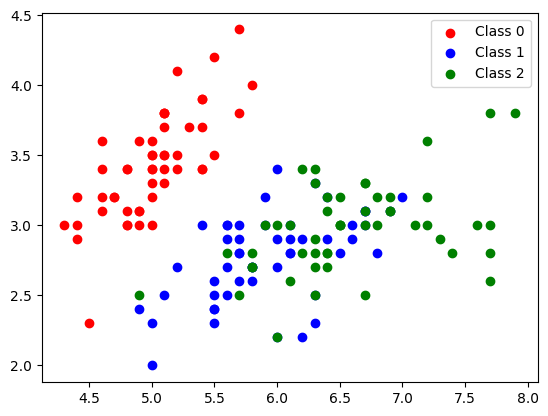

In [15]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color="red", label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color="blue", label="Class 1")
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color="green", label="Class 2")
plt.legend()
plt.show()

### Training and testing data split

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")


X train shape: (90, 2)
X test shape: (60, 2)
y train shape: (90,)
y test shape: (60,)


## Model to predict iris class

In [30]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

def accuracy(y, y_hat):
    acc = (y == y_hat).mean()
    return acc


y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

print(f"Train accuracy: {accuracy(y_train, y_hat_train)}")
print(f"Test accuracy: {accuracy(y_test, y_hat_test)}")

Train accuracy: 0.8666666666666667
Test accuracy: 0.7333333333333333


## Demo code

/Users/andrewlou/Documents/Coding/NYU-Machine-Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/andrewlou/Documents/Coding/NYU-Machine-Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/andrewlou/Documents/Coding/NYU-Machine-Learning/.venv/lib/python3.9/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


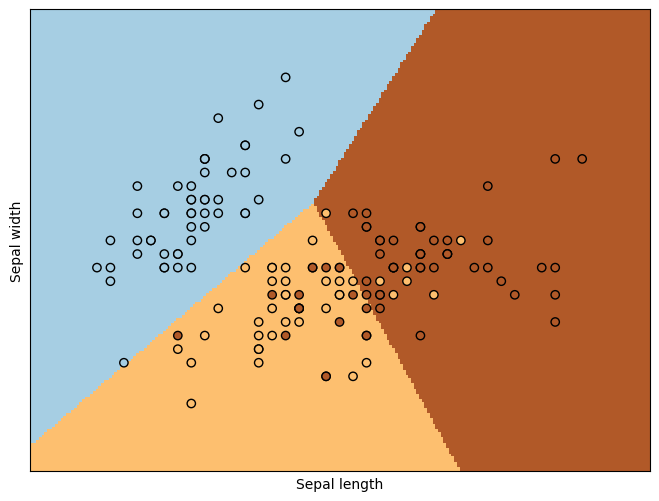

In [31]:
### CODE FROM SKLEARN IRIS DEMO ###

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
logreg = LogisticRegression(random_state=0)
logreg.fit(X, y)
plt.figure(figsize=(8,6))
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()